<a href="https://colab.research.google.com/github/M-Crowson/2020EssexChallengeWeekGroup5/blob/Country-analysis/Copy_of_WebScrapingMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Tweepy
!pip install tweepy

In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
consumer_api_key = 'nCSS9AOFEtjC6z3hSrfdgh760'
consumer_api_secret = 'zj6ELUiIIycKmSEx6jzUgNIYBGLPk7uLnF241rGzmHvcgHQJ9H' 
access_token = '1315955315314167808-3rEY0WXk5XasWU1AgCEX6Ahbkjonzs'
access_token_secret ='rSc7JXXHqwbbqAHOp3qHUwSYpLC8ViXybnnCXs3M4DNWI'

In [ ]:
authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(authorizer ,timeout=15)
all_tweets = []
search_query = '#AppleEvent'

for tweet_object in tweepy.Cursor(api.search,q=search_query+" -filter:retweets",lang='en',result_type='mixed', until='2020-10-14').items(1000):
    #filter out tweets that don't have a place attached to them 
    if tweet_object.place != None:
      all_tweets.append({"text": tweet_object.text, "country": tweet_object.place.country, "country_code" : tweet_object.place.country_code, "sentiment": ""})
      print("Text: " + tweet_object.text)
      print("Country: " + str(tweet_object.place.country))
      print("Country Code: " + str(tweet_object.place.country_code))
      print("--------------------------------------------------------------------------------")


Text: LOL reading up on the #AppleEvent from @WIRED’s @snackfight and this was the only thing that I took away 😂😂😂 https://t.co/19mur8wt2G
Country: United States
Country Code: US
--------------------------------------------------------------------------------
Text: iPhone day and Oculus Quest 2 arrives today?? Yes please! #AppleEvent
Country: United States
Country Code: US
--------------------------------------------------------------------------------
Text: Few hours till the #AppleEvent 🙂
Country: United States
Country Code: US
--------------------------------------------------------------------------------
Text: Like ♥️
 #AppleEvent
Country: Kingdom of Saudi Arabia
Country Code: SA
--------------------------------------------------------------------------------
Text: Samsung and other competitors waiting for release of iPhone 12 🍎 

#AppleEvent #iPhone12 @Apple
Country: United Arab Emirates
Country Code: AE
----------------------------------------------------------------------------

In [ ]:
print(all_tweets)

[{'text': 'LOL reading up on the #AppleEvent from @WIRED’s @snackfight and this was the only thing that I took away 😂😂😂 https://t.co/19mur8wt2G', 'country': 'United States', 'country_code': 'US', 'sentiment': ''}, {'text': 'iPhone day and Oculus Quest 2 arrives today?? Yes please! #AppleEvent', 'country': 'United States', 'country_code': 'US', 'sentiment': ''}, {'text': 'Few hours till the #AppleEvent 🙂', 'country': 'United States', 'country_code': 'US', 'sentiment': ''}, {'text': 'Like ♥️\n #AppleEvent', 'country': 'Kingdom of Saudi Arabia', 'country_code': 'SA', 'sentiment': ''}, {'text': 'Samsung and other competitors waiting for release of iPhone 12 🍎 \n\n#AppleEvent #iPhone12 @Apple', 'country': 'United Arab Emirates', 'country_code': 'AE', 'sentiment': ''}, {'text': 'Hello @tim_cook kindly help me with iphone 12 pro max. \nThank You\n #AppleEvent', 'country': 'Ghana', 'country_code': 'GH', 'sentiment': ''}, {'text': 'Looks very promising @ItsBobbyRevilla👇🏽#iPhone12 #Apple #AppleE

In [ ]:
import numpy as np 
import pandas as pd 
import re  
import nltk # an amazing library to play with natural language
nltk.download('stopwords')  
from nltk.corpus import stopwords 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
print(tweets)

                 tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]


In [ ]:
X = tweets.iloc[:, 10].values  
y = tweets.iloc[:, 1].values

print(X)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [ ]:
#Function for removing web links beggining with a particular character
def remove_words_starting_with(link_text, starting_text):
    while starting_text in link_text: 
        word_start = link_text.find(starting_text)
        if link_text.find(' ', word_start + 1) >=0:  
            word_end = link_text.find(' ', word_start + 1)
        else:
            word_end = len(link_text) + 1
        link_text = link_text[0:word_start] + link_text[word_end:]
    return link_text

#Function for cleaning text
def clean_text(text_in):

  #remove web links
  processed_tweet = remove_words_starting_with(text_in, "http")

  #remove user links
  processed_tweet = remove_words_starting_with(processed_tweet, "@")
      
  # Remove all the special characters
  processed_tweet = re.sub(r'\W', ' ', processed_tweet)

  # remove all single characters
  processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

  # Remove single characters from the start
  processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

  # Substituting multiple spaces with single space
  processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

  # Removing prefixed 'b'
  processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

  # Converting to Lowercase
  processed_tweet = processed_tweet.lower()

  return processed_tweet


In [ ]:
processed_tweets = []

for tweet in range(0, len(X)):  
    tweet = clean_text(str(X[tweet]))
    processed_tweets.append(tweet)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
import seaborn
import matplotlib.pyplot as plt


# converts sentiment value from positive, neutral and negative into an integer value
# positive = 1, neutral=0, negative = -1
def sentiment_as_number(sentiment_as_word):
  if sentiment_as_word == 'positive':
    return 1
  elif sentiment_as_word == 'neutral':
    return 0
  elif sentiment_as_word == 'negative':
    return -1
  else:
    return "unidentified"

# Takes in a list of dictionaries, where each dictionary represents a tweet. Each dictionary in list should have "text", "country" and "sentiment" values.
# returns a list of dictionaries, where each dictionary represents a country, the number of tweets from that country and the net sentiment value. 
def calculate_country_data(full_tweet_list):
  country_data = [] 
  for tweet in full_tweet_list:
    text = tweet.get("text")
    country = tweet.get("country")
    sentiment = tweet.get("sentiment")
    sentiment_number = sentiment_as_number(sentiment)

    if len(country_data) == 0:
      country_data.append({"country": country, "number of tweets": 1, "net sentiment": sentiment_number})
    else:
      if  not any(country_dict['country'] == country for country_dict in country_data):
        country_data.append({"country": country, "number of tweets": 1, "net sentiment": sentiment_number})
      else: 
        for country_dict in country_data:
          if country_dict['country'] == country: 
            num_of_tweets = country_dict.get("number of tweets") + 1
            country_dict.update({"number of tweets": num_of_tweets})
            net_sent = country_dict.get("net sentiment") + sentiment_number
            country_dict.update({"net sentiment": net_sent})
        
  return country_data    


# creates pie chart from country_dataset where slice size = number of tweets and shade of slice = net sentiment
def pie_from_dataset(dataset):
  # variables for pie chart
  labels = []
  sizes= []
  color_values= []
  explode_values = []

  #sort dataset by net sentiment (lowest to highest)
  sorted_dataset = sorted(dataset, key= lambda i: i['net sentiment'])
  

  #create colour palette and assing color value to each country based on net sentiment
  lowest_net_sentiment = min(sorted_dataset, key= lambda i:i.get('net sentiment'))
  lowest_net_sentiment = lowest_net_sentiment.get("net sentiment")
  highest_net_sentiment = max(sorted_dataset, key= lambda i:i.get('net sentiment'))
  highest_net_sentiment = highest_net_sentiment.get("net sentiment")
  if abs(lowest_net_sentiment) > (highest_net_sentiment):
    index_shift = abs(lowest_net_sentiment)
    number_of_colours = abs(lowest_net_sentiment)*2
    if number_of_colours % 2 == 0: 
      number_of_colours = number_of_colours + 1
  else: 
    index_shift = abs(highest_net_sentiment)
    number_of_colours = abs(highest_net_sentiment)*2
    if number_of_colours % 2 == 0:
      number_of_colours = number_of_colours + 1
  
  for country in sorted_dataset:
    net_sentiment = country.get("net sentiment")
    country.update({"color_index":(net_sentiment + index_shift)})

  color_palette = seaborn.color_palette("RdYlGn", number_of_colours)
  

  #create lists for pie chart parameters
  for country in sorted_dataset: 
    labels.append(country.get("country"))
    sizes.append(country.get("number of tweets"))
    color_value = color_palette[country.get("color_index")]
    color_values.append(color_value)
    explode_values.append(0.5)

  return plt.pie(sizes, labels=labels, colors=color_values, labeldistance=1.1, explode=explode_values, startangle=100, rotatelabels=True)




[{'text': 'lol reading up on the appleevent from and this was the only thing that took away ', 'country': 'United States', 'country_code': 'US', 'sentiment': 'negative'}, {'text': 'iphone day and oculus quest 2 arrives today yes please appleevent', 'country': 'United States', 'country_code': 'US', 'sentiment': 'negative'}, {'text': 'few hours till the appleevent ', 'country': 'United States', 'country_code': 'US', 'sentiment': 'negative'}, {'text': 'like appleevent', 'country': 'Kingdom of Saudi Arabia', 'country_code': 'SA', 'sentiment': 'neutral'}, {'text': 'samsung and other competitors waiting for release of iphone 12 appleevent iphone12 ', 'country': 'United Arab Emirates', 'country_code': 'AE', 'sentiment': 'negative'}, {'text': 'hello kindly help me with iphone 12 pro max thank you appleevent', 'country': 'Ghana', 'country_code': 'GH', 'sentiment': 'positive'}, {'text': 'looks very promising apple appleevent ', 'country': 'United Kingdom', 'country_code': 'GB', 'sentiment': 'neu

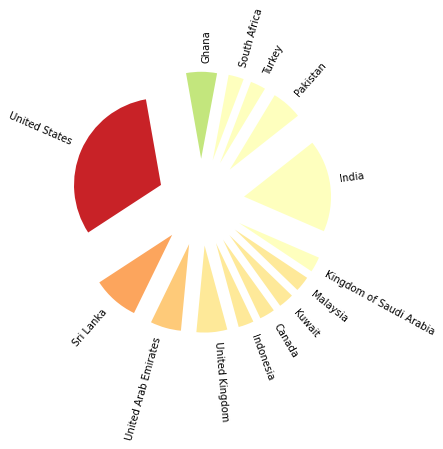

In [ ]:
for tweet in all_tweets:
    tweet_text = clean_text(tweet.get("text"))
    sentiment = text_classifier.predict(tfidfconverter.transform([tweet_text]).toarray())
    sentiment = sentiment[0]
    tweet.update({"text":tweet_text})
    tweet.update({"sentiment":sentiment})
  

total_tweets = len(all_tweets)

print(all_tweets)
print("Total tweets: " + str(total_tweets))

country_dataset = calculate_country_data(all_tweets)
print(country_dataset)

pie_chart = pie_from_dataset(country_dataset)


